# Ferramentas
Utlizaremos as bibliotecas NumPy para facilitar o calculo com matrizes e vetores, e o MatPlotLib para gerar as visualizações em gráficos.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Classes de Vetores e Gráficos
Definindo as classe de vetores para ser compatível com a classe Gráfico.

In [4]:
class Vetor:
    def __init__(self, nome, cor, entradas):
        self.nome = nome
        self.cor = cor
        self.entradas = np.array(entradas)

Definindo a classe Gráfico.

In [5]:
class Grafico:
    def __init__(self, raio:int, nome:str, vetores: list[Vetor]):
        self.raio = raio
        self.nome = nome
        self.vetores = vetores

        if vetores is None:
            self.vetores = []

    def plot_graph(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-self.raio, self.raio)
        ax.set_ylim(-self.raio, self.raio)
        ax.set_aspect('equal')
        ax.set_title(self.nome)

        # Configura grade de 1 em 1 e coloca abaixo dos vetores
        ax.set_xticks(np.arange(-self.raio, self.raio + 1, 1))
        ax.set_yticks(np.arange(-self.raio, self.raio + 1, 1))
        ax.grid(True, which='both', linestyle='--', linewidth=0.7)
        ax.set_axisbelow(True)  # grade fica embaixo dos vetores

        for v in self.vetores:
            ax.quiver(0, 0,v.entradas[0], v.entradas[1],angles='xy', scale_units='xy', scale=1,color=v.cor, label=v.nome)

        ax.legend()
        plt.show()

# 1. Composição
##
$$
R_{45º} =
\begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix}
$$
# Composição: Rotação 90° (R) seguida de Shear em x (S)

Vamos usar vetores como colunas. Logo, se aplico rotação **depois** shear ao vetor, o operador composto é:
$$
T = S_x \cdot R $$

Definições e cálculo passo a passo abaixo.





## 1.1 Matrizes



$$ R =
\begin{bmatrix}
0 & -1 \\
1 & 0
\end{bmatrix} $$

Shear em (x) com (x=3):
$$ S_x =
\begin{bmatrix}
1 & 3 \\
0 & 1
\end{bmatrix} $$

## 1.2 Vetores iniciais
Utilizaremos os vetores canônicos para a demonstração visual.
$$
e_1 = \begin{bmatrix}1\\0\end{bmatrix},\qquad
e_2 = \begin{bmatrix}0\\1\end{bmatrix}
$$



De forma conveniente montaremos uma matriz com os vetores a serem transformados onde cada vetor vira uma coluna, na forma:

$$\\
A =
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}
$$

# Representação dos Vetores sem transformação

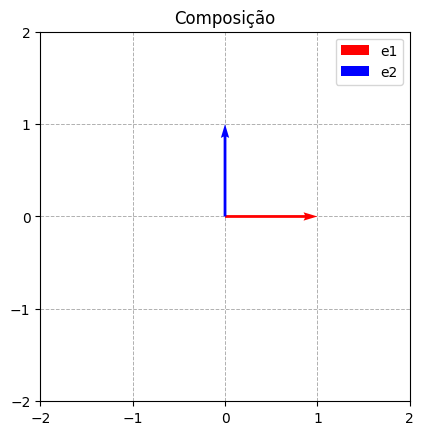

In [8]:
# definindo os vetores canonicos
e1 = Vetor("e1", "red", [1,0])
e2 = Vetor("e2", "blue", [0,1])

g = Grafico(2, "Composição", [e1,e2])
g.plot_graph()

## Definindo as matrizes e aplicando a transformação.

$$ I =
\begin{pmatrix}
1 & 0\\[4pt]
0 & 1
\end{pmatrix},
\qquad
R_{90^\circ} =
\begin{pmatrix}
0 & -1\\[4pt]
1 & \;0
\end{pmatrix}$$

$$
I \cdot R_{90^\circ} =
\begin{pmatrix}
1 & 0\\[4pt]
0 & 1
\end{pmatrix}
\begin{pmatrix}
0 & -1\\[4pt]
1 & 0
\end{pmatrix}
=
\begin{pmatrix}
1\cdot 0 + 0\cdot 1 & 1\cdot(-1) + 0\cdot 0\\[6pt]
0\cdot 0 + 1\cdot 1 & 0\cdot(-1) + 1\cdot 0
\end{pmatrix}
=
\begin{pmatrix}
0 & -1\\[4pt]
1 & 0
\end{pmatrix}
= R_{90^\circ}
 $$

Após a tranformação, obtemos a matriz:
$$ I \cdot R_{90^\circ} = \begin{pmatrix}
0 & -1\\[4pt]
1 & 0
\end{pmatrix} $$

## Ao representarmos graficamente obtemos:

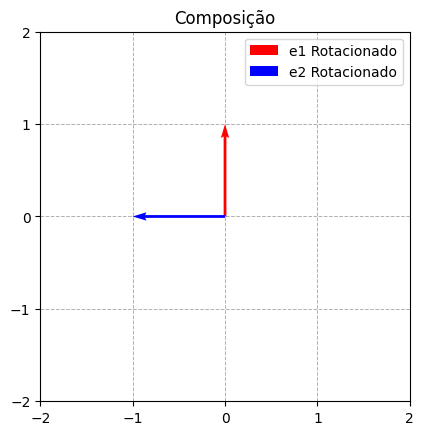

In [21]:
matriz_i = np.array([[1,0],[0,1]])
matriz_rot_90 = np.array([[0,-1],[1,0]])
matriz_rotacionada = np.dot(matriz_i,matriz_rot_90)
vetores = []


v1 = Vetor("e1 Rotacionado", "red", matriz_rotacionada[:, 0])
v2 = Vetor("e2 Rotacionado", "blue", matriz_rotacionada[:, 1])

g = Grafico(2, "Composição", [v1,v2])
g.plot_graph()

# Aplicando o shear

$$ T=
S_h \cdot R_{90^\circ} =
\begin{pmatrix}
1 & 3\\[4pt]
0 & 1
\end{pmatrix}
\begin{pmatrix}
0 & -1\\[4pt]
1 & 0
\end{pmatrix}
=
\begin{pmatrix}
1\cdot 0 + 3\cdot 1 & 1\cdot(-1) + 3\cdot 0\\[6pt]
0\cdot 0 + 1\cdot 1 & 0\cdot(-1) + 1\cdot 0
\end{pmatrix}
=
\begin{pmatrix}
3 & -1\\[4pt]
1 & 0
\end{pmatrix}
$$


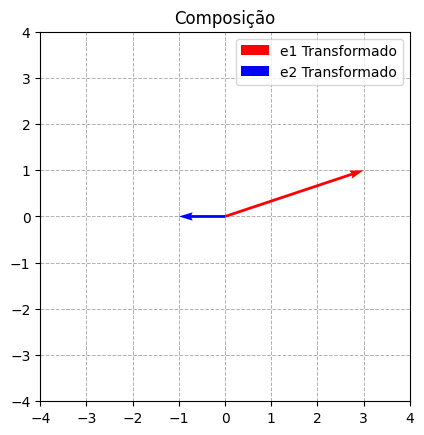

In [24]:
# matriz rotacionada anterior
shear_hor_3 = np.array([[1,3],[0,1]])
matriz_transformada = np.dot(shear_hor_3,matriz_rotacionada)

t1 = Vetor("e1 Transformado", "red", matriz_transformada[:, 0])
t2 = Vetor("e2 Transformado", "blue", matriz_transformada[:, 1])

g = Grafico(4, "Composição", [t1,t2])
g.plot_graph()


# Determinante
Ao calcularmos o determinante da matriz T, conseguiremos interpretar o quanto essa transformação linear distorce a área e se há alternação na orientação da base geradora desse espaço.
Em uma matriz A,
$$ A = \begin{pmatrix}
a & b\\[4pt]
c & d
\end{pmatrix} $$
o determinante é dado por:
$$ det(A) = ad-bc $$
Aplicando na matriz T, temos:
$$ det(T) = 3\cdot0 - (-1)\cdot1 = 1$$